In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Метод главных компонент
### (Principal component analysis, PCA)

<a href="https://www.youtube.com/watch?v=JEYLfIVvR9I">It had to be U - the SVD song</a> --- веселая песенка :)

**Explained Visually (a setosa project):**

<a href="http://setosa.io/ev/principal-component-analysis/">Principal Component Analysis</a>

<a href="http://setosa.io/ev/eigenvectors-and-eigenvalues/">Eigenvectors and Eigenvalues</a>

## SVD-разложение

Генерируем датасет

In [2]:
X = sp.stats.uniform.rvs(size=(100, 10))
print(X)

[[  2.47942592e-01   4.04741103e-01   8.95177130e-01   1.92685279e-01
    3.11190890e-01   7.09808567e-01   4.94554663e-01   6.74345715e-01
    9.15987280e-01   8.42579828e-01]
 [  2.15332141e-02   5.69405895e-01   8.73040258e-01   4.77583754e-01
    7.31349401e-01   5.05813713e-01   2.47484691e-01   4.65708794e-01
    5.04748528e-01   6.45770620e-02]
 [  4.40489972e-01   1.42146875e-01   9.75643648e-01   7.54507357e-01
    8.13093198e-01   7.44279052e-01   5.88825573e-01   9.23045183e-01
    9.17449194e-01   5.11911104e-01]
 [  6.53274374e-01   8.26535989e-01   3.39737795e-01   9.40014796e-02
    6.57725209e-01   4.82820179e-01   5.38361777e-01   7.63195446e-01
    8.14804266e-01   7.47955794e-01]
 [  1.30143309e-02   8.24833177e-01   8.49396985e-01   6.42532687e-01
    6.17271889e-01   7.89523679e-02   3.19813083e-01   9.36561462e-01
    2.10512037e-01   6.30976130e-02]
 [  7.19744120e-01   9.74258893e-01   7.85115240e-02   6.86455677e-01
    2.10032704e-01   8.95312409e-01   6.37616

Вот так можно вычислять сингулярное разложение

In [3]:
U, D, V = sp.linalg.svd(X, full_matrices=False)
print(U.shape, D.shape, V.shape)

(100, 10) (10,) (10, 10)


## PCA

Генерируем двумерный датасет

In [4]:
X = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 3], cov=[[3, 1], [1, 1]])

Применяем PCA с одной главной компонентой

In [5]:
pca = PCA(n_components=1)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

На первом графике синим отмечены исходные точки, красным - они же после проецирования и обратного преобразования.
На втором графике точки в одномерном пространстве.

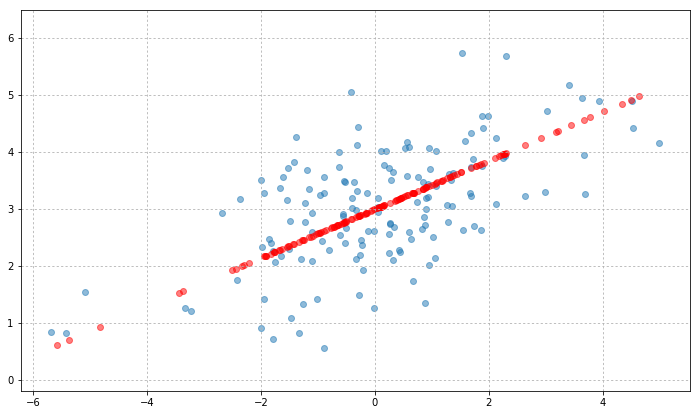

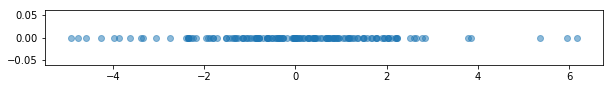

In [6]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_hat[:, 0], X_hat[:, 1], c='red', alpha=0.5)
plt.axis('equal')
plt.grid(ls=':')
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), alpha=0.5)
plt.show()

Пусть есть два хорошо разделимых класса

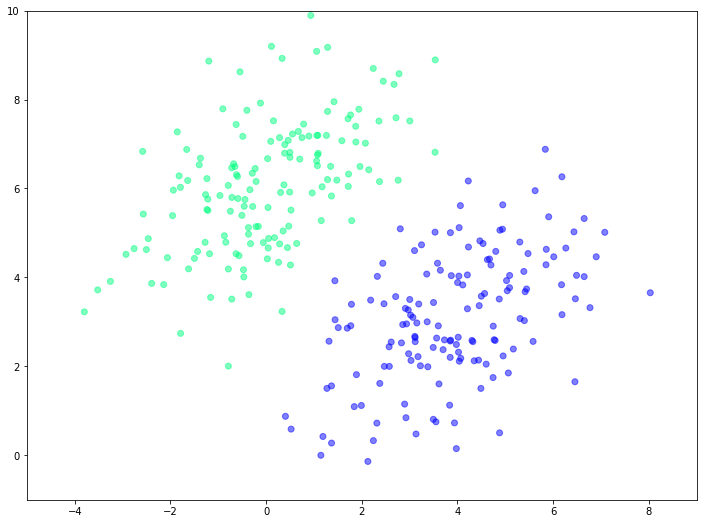

In [7]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[4, 3], cov=[[2, 1], [1, 2]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 6], cov=[[2, 1], [1, 2]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='winter')
plt.xlim((-5, 9))
plt.ylim((-1, 10))
plt.show()

Проецируем на одномерное подпространство, тут хорошо заметна пространственная структура классов.

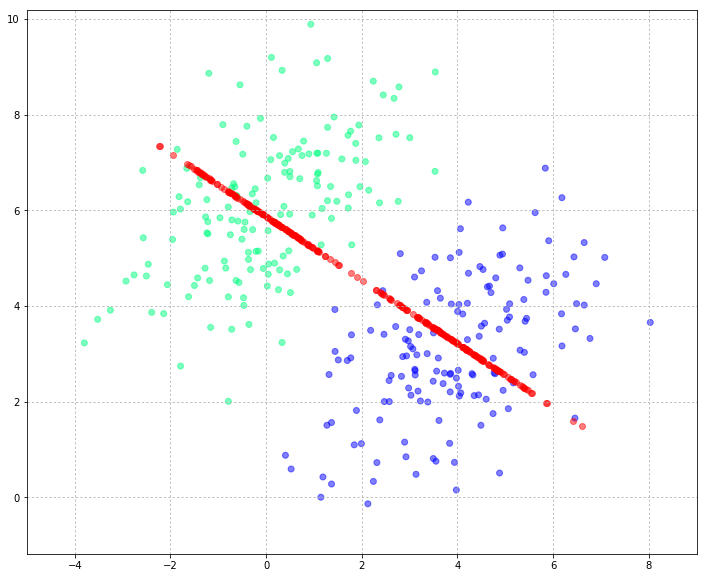

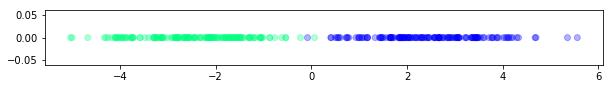

In [8]:
pca = PCA(n_components=1)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='winter')
plt.scatter(X_hat[:, 0], X_hat[:, 1], c='red', alpha=0.5)
plt.axis('equal')
plt.grid(ls=':')
plt.xlim((-5, 9))
plt.ylim((-1, 10))
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), c=c, alpha=0.3, cmap='winter')
plt.show()

А что, если два вытянутых класса, расположенных близко, как на рисунке ниже?

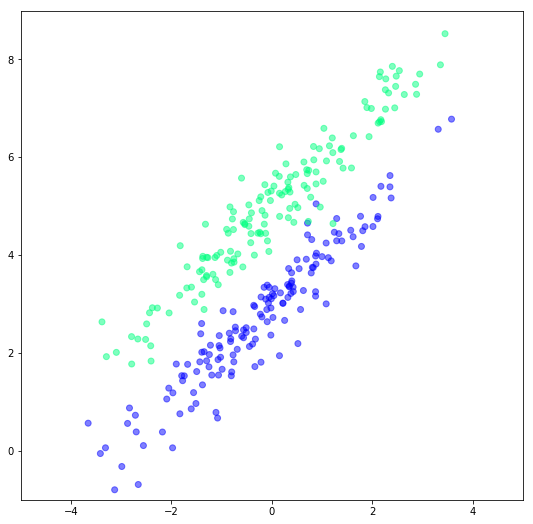

In [9]:
a = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 3], cov=[[2, 1.9], [1.9, 2]])
b = sp.stats.multivariate_normal.rvs(size=150, mean=[0, 5], cov=[[2, 1.9], [1.9, 2]])
X = np.vstack([a, b])
c = np.hstack([np.zeros(len(a)), np.ones(len(b))])

plt.figure(figsize=(9, 9))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='winter')
plt.xlim((-5, 5))
plt.ylim((-1, 9))
plt.show()

Главная компонента направлена вдоль этих классов, и при проецировании точки классов смешаются.

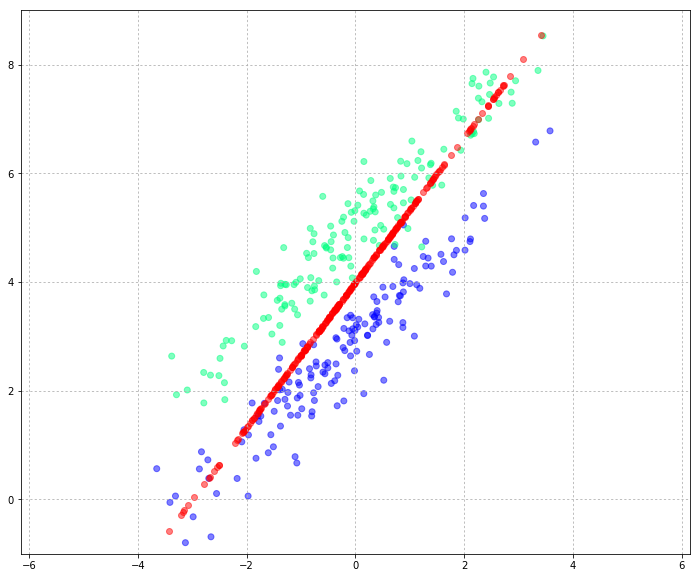

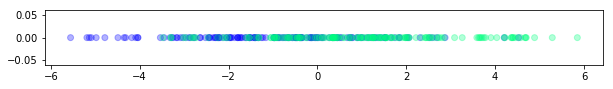

In [10]:
pca = PCA(n_components=1)
Y = pca.fit_transform(X)
X_hat = pca.inverse_transform(Y)

plt.figure(figsize=(12, 10))
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5, cmap='winter')
plt.scatter(X_hat[:, 0], X_hat[:, 1], c='red', alpha=0.5)
plt.axis('equal')
plt.grid(ls=':')
plt.xlim((-5, 5))
plt.ylim((-1, 9))
plt.show()

plt.figure(figsize=(10, 1))
plt.scatter(Y, np.zeros(len(Y)), c=c, alpha=0.3, cmap='winter')
plt.show()

# Другие методы снижения размерности

http://scikit-learn.org/stable/modules/manifold.html#manifold

Примеры:

http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

http://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py